In [1]:
#library
import pandas as pd
import numpy as np
#visuallisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mito.csv')
df

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.0,106.1400,2011
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,2011
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,4,0.0,29.6400,2011
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,2011
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,Erica Bern,Corporate,United States,West,OFF-BI-10002103,Office Supplies,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,2014
51286,MO-2014-2560,12/31/2014,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,2014
51287,MX-2014-110527,12/31/2014,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,2014
51288,MX-2014-114783,12/31/2014,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,2014


In [3]:
df.shape

(51290, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       51290 non-null  object 
 1   order_date     51290 non-null  object 
 2   customer_name  51290 non-null  object 
 3   segment        51290 non-null  object 
 4   country        51290 non-null  object 
 5   region         51290 non-null  object 
 6   product_id     51290 non-null  object 
 7   category       51290 non-null  object 
 8   product_name   51290 non-null  object 
 9   sales          51290 non-null  object 
 10  quantity       51290 non-null  int64  
 11  discount       51290 non-null  float64
 12  profit         51290 non-null  float64
 13  year           51290 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 5.5+ MB


In [5]:
#kolom sales seharusnya integer atau float bukan objek
df['sales'] = df['sales'].astype('int')

ValueError: invalid literal for int() with base 10: '1,648'

In [6]:
df.loc[df['sales'] == '1,648']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
27,MX-2011-111255,01-04-2011,Russell Applegate,Consumer,Brazil,South,FUR-BO-10001498,Furniture,"Dania Classic Bookcase, Pine","1,648",6,0.0,609.84,2011
4361,IT-2011-1298611,8/17/2011,Delfina Latchford,Consumer,Netherlands,Central,FUR-BO-10000279,Furniture,"Dania Classic Bookcase, Pine","1,648",8,0.5,-626.52,2011


In [7]:
#karena terdapat tanda (,) maka kita harus hilangkan terlebih dahulu
df['sales'] = df['sales'].str.replace(',', '').astype('int')

In [8]:
#hasilnya akan berubah seperti dibawah ini
df.loc[df['sales'] == 1648]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
27,MX-2011-111255,01-04-2011,Russell Applegate,Consumer,Brazil,South,FUR-BO-10001498,Furniture,"Dania Classic Bookcase, Pine",1648,6,0.0,609.84,2011
4361,IT-2011-1298611,8/17/2011,Delfina Latchford,Consumer,Netherlands,Central,FUR-BO-10000279,Furniture,"Dania Classic Bookcase, Pine",1648,8,0.5,-626.52,2011


In [9]:
#added new kolom dengan hasil dari quantity * 10
df['new_quantity'] = df['quantity'] * 10

In [10]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year,new_quantity
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.0,106.140,2011,20
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,2011,30


In [11]:
#particular colom
#buat kolom nesales dengan posisi kolom ke 10 dengan hasil dari sales * 100
df.insert(10, 'new_sales', df['sales'] * 100)

In [12]:
df.head()

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,6600,4,0.0,29.640,2011,40
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45,4500,3,0.5,-26.055,2011,30
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,11400,5,0.1,37.770,2011,50


Cara menghapus data :
df.drop('customer_name', axis=1) atau
df.drop('customer_name', axis=1, interplace = True)

In [13]:
df.sort_values(by='profit', ascending = False)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
29530,CA-2013-118689,10-03-2013,Tamara Chand,Corporate,United States,Central,TEC-CO-10004722,Technology,Canon imageCLASS 2200 Advanced Copier,17500,1750000,5,0.0,8399.9760,2013,50
36239,CA-2014-140151,3/24/2014,Raymond Buch,Consumer,United States,West,TEC-CO-10004722,Technology,Canon imageCLASS 2200 Advanced Copier,14000,1400000,4,0.0,6719.9808,2014,40
48097,CA-2014-166709,11/18/2014,Hunter Lopez,Consumer,United States,East,TEC-CO-10004722,Technology,Canon imageCLASS 2200 Advanced Copier,10500,1050000,3,0.0,5039.9856,2014,30
33011,CA-2013-117121,12/18/2013,Adrian Barton,Consumer,United States,Central,OFF-BI-10000545,Office Supplies,GBC Ibimaster 500 Manual ProClick Binding System,9893,989300,13,0.0,4946.3700,2013,130
5522,CA-2011-116904,9/23/2011,Sanjit Chand,Consumer,United States,Central,OFF-BI-10001120,Office Supplies,Ibico EPK-21 Electric Binding System,9450,945000,5,0.0,4630.4755,2011,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37130,CA-2014-134845,4/18/2014,Sharelle Roach,Home Office,United States,West,TEC-MA-10000822,Technology,Lexmark MX611dhe Monochrome Laser Printer,2550,255000,5,0.7,-3399.9800,2014,50
3775,CA-2011-169019,7/26/2011,Luke Foster,Consumer,United States,Central,OFF-BI-10004995,Office Supplies,GBC DocuBind P400 Electric Binding System,2178,217800,8,0.8,-3701.8928,2011,80
47195,US-2014-168116,11-05-2014,Grant Thornton,Corporate,United States,South,TEC-MA-10004125,Technology,Cubify CubeX 3D Printer Triple Head Print,8000,800000,4,0.5,-3839.9904,2014,40
29212,TU-2013-9400,9/26/2013,Denise Monton,Corporate,Turkey,EMEA,TEC-MOT-10003050,Technology,"Motorola Smart Phone, Cordless",3085,308500,12,0.6,-4088.3760,2013,120


filtering data


In [14]:
df[df['region'] == 'Africa']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20
23,TZ-2011-7370,01-03-2011,Jack Garza,Consumer,Tanzania,Africa,OFF-STI-10000388,Office Supplies,"Stiletto Scissors, Serrated",81,8100,4,0.0,26.760,2011,40
41,SU-2011-5190,01-04-2011,Jasper Cacioppo,Consumer,Sudan,Africa,OFF-BOS-10004950,Office Supplies,"Boston Pens, Fluorescent",15,1500,1,0.0,2.610,2011,10
42,SU-2011-5190,01-04-2011,Jasper Cacioppo,Consumer,Sudan,Africa,OFF-AVE-10003279,Office Supplies,"Avery Hole Reinforcements, Durable",6,600,1,0.0,2.100,2011,10
55,AO-2011-4910,01-06-2011,Grace Kelly,Corporate,Angola,Africa,TEC-LOG-10003079,Technology,"Logitech Flash Drive, Erganomic",28,2800,1,0.0,12.720,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51252,OD-2014-9490,12/31/2014,Mitch Willingham,Corporate,South Sudan,Africa,TEC-CAN-10004291,Technology,"Canon Wireless Fax, Digital",378,37800,1,0.0,166.440,2014,10
51253,AO-2014-7730,12/31/2014,Ken Lonsdale,Consumer,Angola,Africa,OFF-SAN-10001094,Office Supplies,"SanDisk Memo Slips, 8.5 x 11",127,12700,6,0.0,20.160,2014,60
51262,TZ-2014-8350,12/31/2014,Joseph Airdo,Consumer,Tanzania,Africa,OFF-FEL-10001792,Office Supplies,"Fellowes Folders, Wire Frame",23,2300,1,0.1,4.053,2014,10
51280,TZ-2014-8220,12/31/2014,Christine Kargatis,Home Office,Tanzania,Africa,OFF-HAR-10001531,Office Supplies,"Harbour Creations Removable Labels, Adjustable",50,5000,6,0.0,6.840,2014,60


In [15]:
df[(df['segment'] == 'Corporate') & (df['category'] == 'Technology')]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
28,MX-2011-140641,01-04-2011,Maya Herman,Corporate,Mexico,North,TEC-AC-10001082,Technology,"Enermax Keyboard, Bluetooth",223,22300,4,0.000,13.28000,2011,40
32,MX-2011-140641,01-04-2011,Maya Herman,Corporate,Mexico,North,TEC-CO-10002998,Technology,"Sharp Ink, Laser",166,16600,2,0.002,49.42824,2011,20
55,AO-2011-4910,01-06-2011,Grace Kelly,Corporate,Angola,Africa,TEC-LOG-10003079,Technology,"Logitech Flash Drive, Erganomic",28,2800,1,0.000,12.72000,2011,10
66,LE-2011-9590,01-07-2011,Harry Marie,Corporate,Lebanon,EMEA,TEC-HP -10000464,Technology,"HP Fax and Copier, Color",174,17400,1,0.000,71.46000,2011,10
92,ID-2011-20814,01-09-2011,Ed Braxton,Corporate,Indonesia,Southeast Asia,TEC-PH-10001730,Technology,"Motorola Signal Booster, Full Size",240,24000,2,0.170,-11.60280,2011,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51250,IN-2014-78228,12/31/2014,Maya Herman,Corporate,Indonesia,Southeast Asia,TEC-PH-10004402,Technology,"Cisco Headset, with Caller ID",294,29400,4,0.170,88.42080,2014,40
51251,MX-2014-122511,12/31/2014,Rick Reed,Corporate,Dominican Republic,Caribbean,TEC-AC-10003857,Technology,"Memorex Keyboard, Programmable",155,15500,4,0.200,40.75200,2014,40
51252,OD-2014-9490,12/31/2014,Mitch Willingham,Corporate,South Sudan,Africa,TEC-CAN-10004291,Technology,"Canon Wireless Fax, Digital",378,37800,1,0.000,166.44000,2014,10
51259,MX-2014-116267,12/31/2014,Erica Bern,Corporate,Brazil,South,TEC-AC-10003454,Technology,"Enermax Memory Card, Erganomic",75,7500,1,0.000,28.42000,2014,10


In [16]:
df[(df['country'] == 'Canada') & (df['sales'] > 500)]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
811,CA-2011-1800,03-01-2011,Tom Prescott,Consumer,Canada,Canada,OFF-FEL-10001405,Office Supplies,"Fellowes File Cart, Industrial",551,55100,4,0.0,71.64,2011,40
1941,CA-2011-5840,05-03-2011,Cindy Chapman,Consumer,Canada,Canada,TEC-STA-10004181,Technology,"StarTech Inkjet, Durable",600,60000,2,0.0,66.00,2011,20
3695,CA-2011-450,7/21/2011,Ellis Ballard,Corporate,Canada,Canada,OFF-HAM-10003663,Office Supplies,"Hamilton Beach Stove, Black",1084,108400,2,0.0,400.86,2011,20
6601,CA-2011-5260,11-01-2011,Logan Currie,Consumer,Canada,Canada,TEC-CAN-10003392,Technology,"Canon Copy Machine, Color",527,52700,2,0.0,131.76,2011,20
6954,CA-2011-9430,11-09-2011,Patrick Bzostek,Home Office,Canada,Canada,TEC-STA-10004536,Technology,"StarTech Inkjet, Wireless",604,60400,2,0.0,18.06,2011,20
10929,CA-2012-9170,4/16/2012,Cathy Armstrong,Home Office,Canada,Canada,OFF-CUI-10000140,Office Supplies,"Cuisinart Microwave, Silver",558,55800,2,0.0,0.00,2012,20
11659,CA-2012-220,5/15/2012,Don Miller,Corporate,Canada,Canada,OFF-ROG-10002132,Office Supplies,"Rogers Lockers, Industrial",848,84800,4,0.0,322.32,2012,40
12180,CA-2012-2420,06-02-2012,Jack Lebron,Consumer,Canada,Canada,OFF-TEN-10004194,Office Supplies,"Tenex File Cart, Single Width",538,53800,4,0.0,252.96,2012,40
12265,CA-2012-9610,06-05-2012,Nicole Hansen,Corporate,Canada,Canada,OFF-ROG-10003898,Office Supplies,"Rogers Lockers, Single Width",847,84700,4,0.0,372.48,2012,40
12339,CA-2012-9650,06-07-2012,Andrew Allen,Consumer,Canada,Canada,OFF-HAM-10004917,Office Supplies,"Hamilton Beach Stove, Red",1085,108500,2,0.0,488.10,2012,20


Pivot table

In [17]:
df.pivot_table(index = 'region', columns = 'year', values = 'sales')

year,2011,2012,2013,2014
region,,,,
Africa,161.608640,163.817460,177.023957,174.282020
Canada,137.209677,180.887640,180.773585,182.393701
Caribbean,197.380623,185.401734,190.984344,193.926471
Central,263.916369,256.196170,249.995417,250.349773
Central Asia,344.240223,393.970588,384.195695,351.617368
EMEA,162.021378,153.001873,156.463303,166.594147
East,248.905222,242.767081,236.011765,231.300434
North,271.619898,273.680948,242.150435,261.534430
North Asia,417.457082,311.591002,376.607313,350.875332


In [18]:
df.pivot_table(columns = 'category', index = 'region', values = 'profit')

category,Furniture,Office Supplies,Technology
region,,,
Africa,25.771926,9.353055,48.440717
Canada,62.220000,28.727545,111.486462
Caribbean,16.551755,15.229472,39.676202
Central,26.662190,17.490588,63.484038
Central Asia,102.375967,24.396490,122.962908
EMEA,14.979397,4.509976,18.185492
East,5.068496,23.957114,88.714084
North,32.721765,22.101370,107.205714
North Asia,99.964178,30.725304,149.733502


In [19]:
#menampilkan nilai sum dari kolom value(profit)
df.pivot_table(columns = 'category', index = 'region', values = 'profit', aggfunc ={'profit': 'sum'})

category,Furniture,Office Supplies,Technology
region,,,
Africa,16262.0850,28480.0530,44129.49300
Canada,2613.2400,7957.5300,7246.62000
Caribbean,6223.4600,14818.2760,13529.58504
Central,54550.8401,121314.7209,135538.42064
Central Asia,48935.7120,27104.5000,56439.97500
EMEA,11534.1360,14869.3920,17494.44300
East,3046.1658,41014.5791,47462.03510
North,30922.0680,64403.3930,99272.49152
North Asia,52181.3010,40926.1050,72471.01500


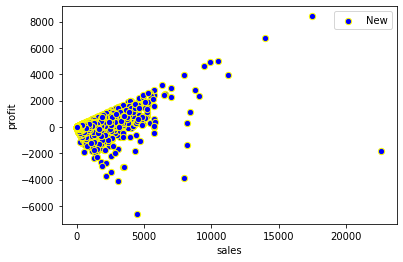

In [20]:
plt.scatter(df.sales, df.profit, color = 'blue', s=40, edgecolor='yellow', label='New')
plt.xlabel('sales'), plt.ylabel('profit')
plt.legend()
plt.show()

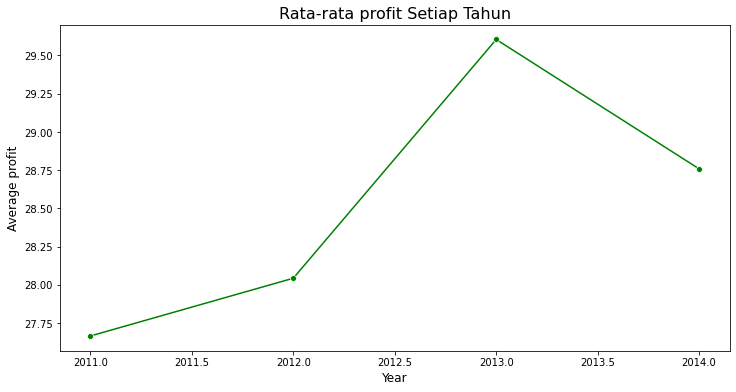

In [21]:
average_income_per_year = df.groupby('year')['profit'].mean().reset_index()

# Line plot untuk melihat rata-rata pendapatan setiap tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_income_per_year, x='year', y='profit', marker='o', color='green')
plt.title('Rata-rata profit Setiap Tahun', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average profit', fontsize=12)
plt.show()

Concatenate 2 columns

In [22]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30


In [23]:
df.segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

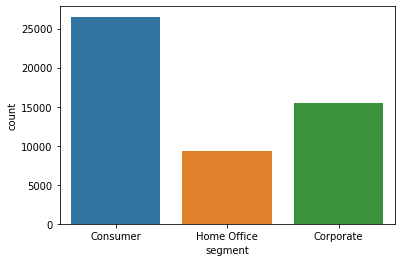

In [24]:
sns.countplot(x=df.segment)
plt.show()

In [25]:
#df concat
df['con'] = df['country']+ ' (' + df['region'] + ')'

In [26]:
df.head()

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20,Algeria (Africa)
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30,Australia (Oceania)
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,6600,4,0.0,29.640,2011,40,Hungary (EMEA)
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45,4500,3,0.5,-26.055,2011,30,Sweden (North)
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,11400,5,0.1,37.770,2011,50,Australia (Oceania)


In [27]:

# Membuat tabel pivot untuk menghitung jumlah order untuk setiap kombinasi segment dan country
pivot_table = df.pivot_table(index='con', columns='segment', values='order_id', aggfunc='count', fill_value=0)

pivot_table.sort_values(by='Consumer', ascending=False)

segment,Consumer,Corporate,Home Office
con,,,
United States (West),1672,960,571
Australia (Oceania),1513,847,477
United States (East),1469,877,502
France (Central),1455,884,488
Mexico (North),1378,816,450
...,...,...,...
Lesotho (Africa),0,6,0
Chad (Africa),0,0,2
South Sudan (Africa),0,1,1


In [28]:
jumlah_negara_per_segmen = df.groupby('segment')['country'].nunique()

print("Jumlah negara berdasarkan segmen yang berbeda:")
print(jumlah_negara_per_segmen)

Jumlah negara berdasarkan segmen yang berbeda:
segment
Consumer       141
Corporate      138
Home Office    129
Name: country, dtype: int64


In [29]:
perbedaan_per_segmen = {}

# Loop untuk setiap segmen
for segmen_tertentu in df['segment'].unique():
    # Ambil set negara yang ada di segmen tersebut
    negara_di_segmen = set(df[df['segment'] == segmen_tertentu]['con'])
    
    # Ambil set semua negara yang ada di DataFrame
    semua_negara = set(df['con'])
    
    # Hitung perbedaan (negara yang ada di semua_negara tetapi tidak ada di negara_di_segmen)
    negara_tidak_ada_di_segmen = semua_negara.difference(negara_di_segmen)
    
    # Simpan hasil perbedaan ke dalam dictionary
    perbedaan_per_segmen[segmen_tertentu] = negara_tidak_ada_di_segmen

# Menampilkan hasil
for segmen, negara_tidak_ada_di_segmen in perbedaan_per_segmen.items():
    print(f"Jenis negara yang tidak ada di segmen '{segmen}':")
    print(negara_tidak_ada_di_segmen)
    print()

Jenis negara yang tidak ada di segmen 'Consumer':
{'Sri Lanka (Central Asia)', 'Eritrea (Africa)', 'Chad (Africa)', 'Lesotho (Africa)', 'Bahrain (EMEA)', 'South Sudan (Africa)'}

Jenis negara yang tidak ada di segmen 'Home Office':
{'Taiwan (North Asia)', 'Burundi (Africa)', 'Central African Republic (Africa)', 'Slovenia (EMEA)', 'Slovakia (EMEA)', 'Azerbaijan (EMEA)', 'Estonia (EMEA)', 'Armenia (EMEA)', 'Montenegro (EMEA)', 'Tajikistan (EMEA)', 'Eritrea (Africa)', 'Gabon (Africa)', 'Lesotho (Africa)', 'Bahrain (EMEA)', 'Mongolia (North Asia)', 'Republic of the Congo (Africa)', 'Namibia (Africa)', 'Equatorial Guinea (Africa)', 'United Arab Emirates (EMEA)'}

Jenis negara yang tidak ada di segmen 'Corporate':
{'Guadeloupe (Caribbean)', 'Guinea-Bissau (Africa)', 'Macedonia (EMEA)', 'Mongolia (North Asia)', 'Tajikistan (EMEA)', 'Burundi (Africa)', 'Chad (Africa)', 'Swaziland (Africa)', 'Armenia (EMEA)', 'Equatorial Guinea (Africa)'}



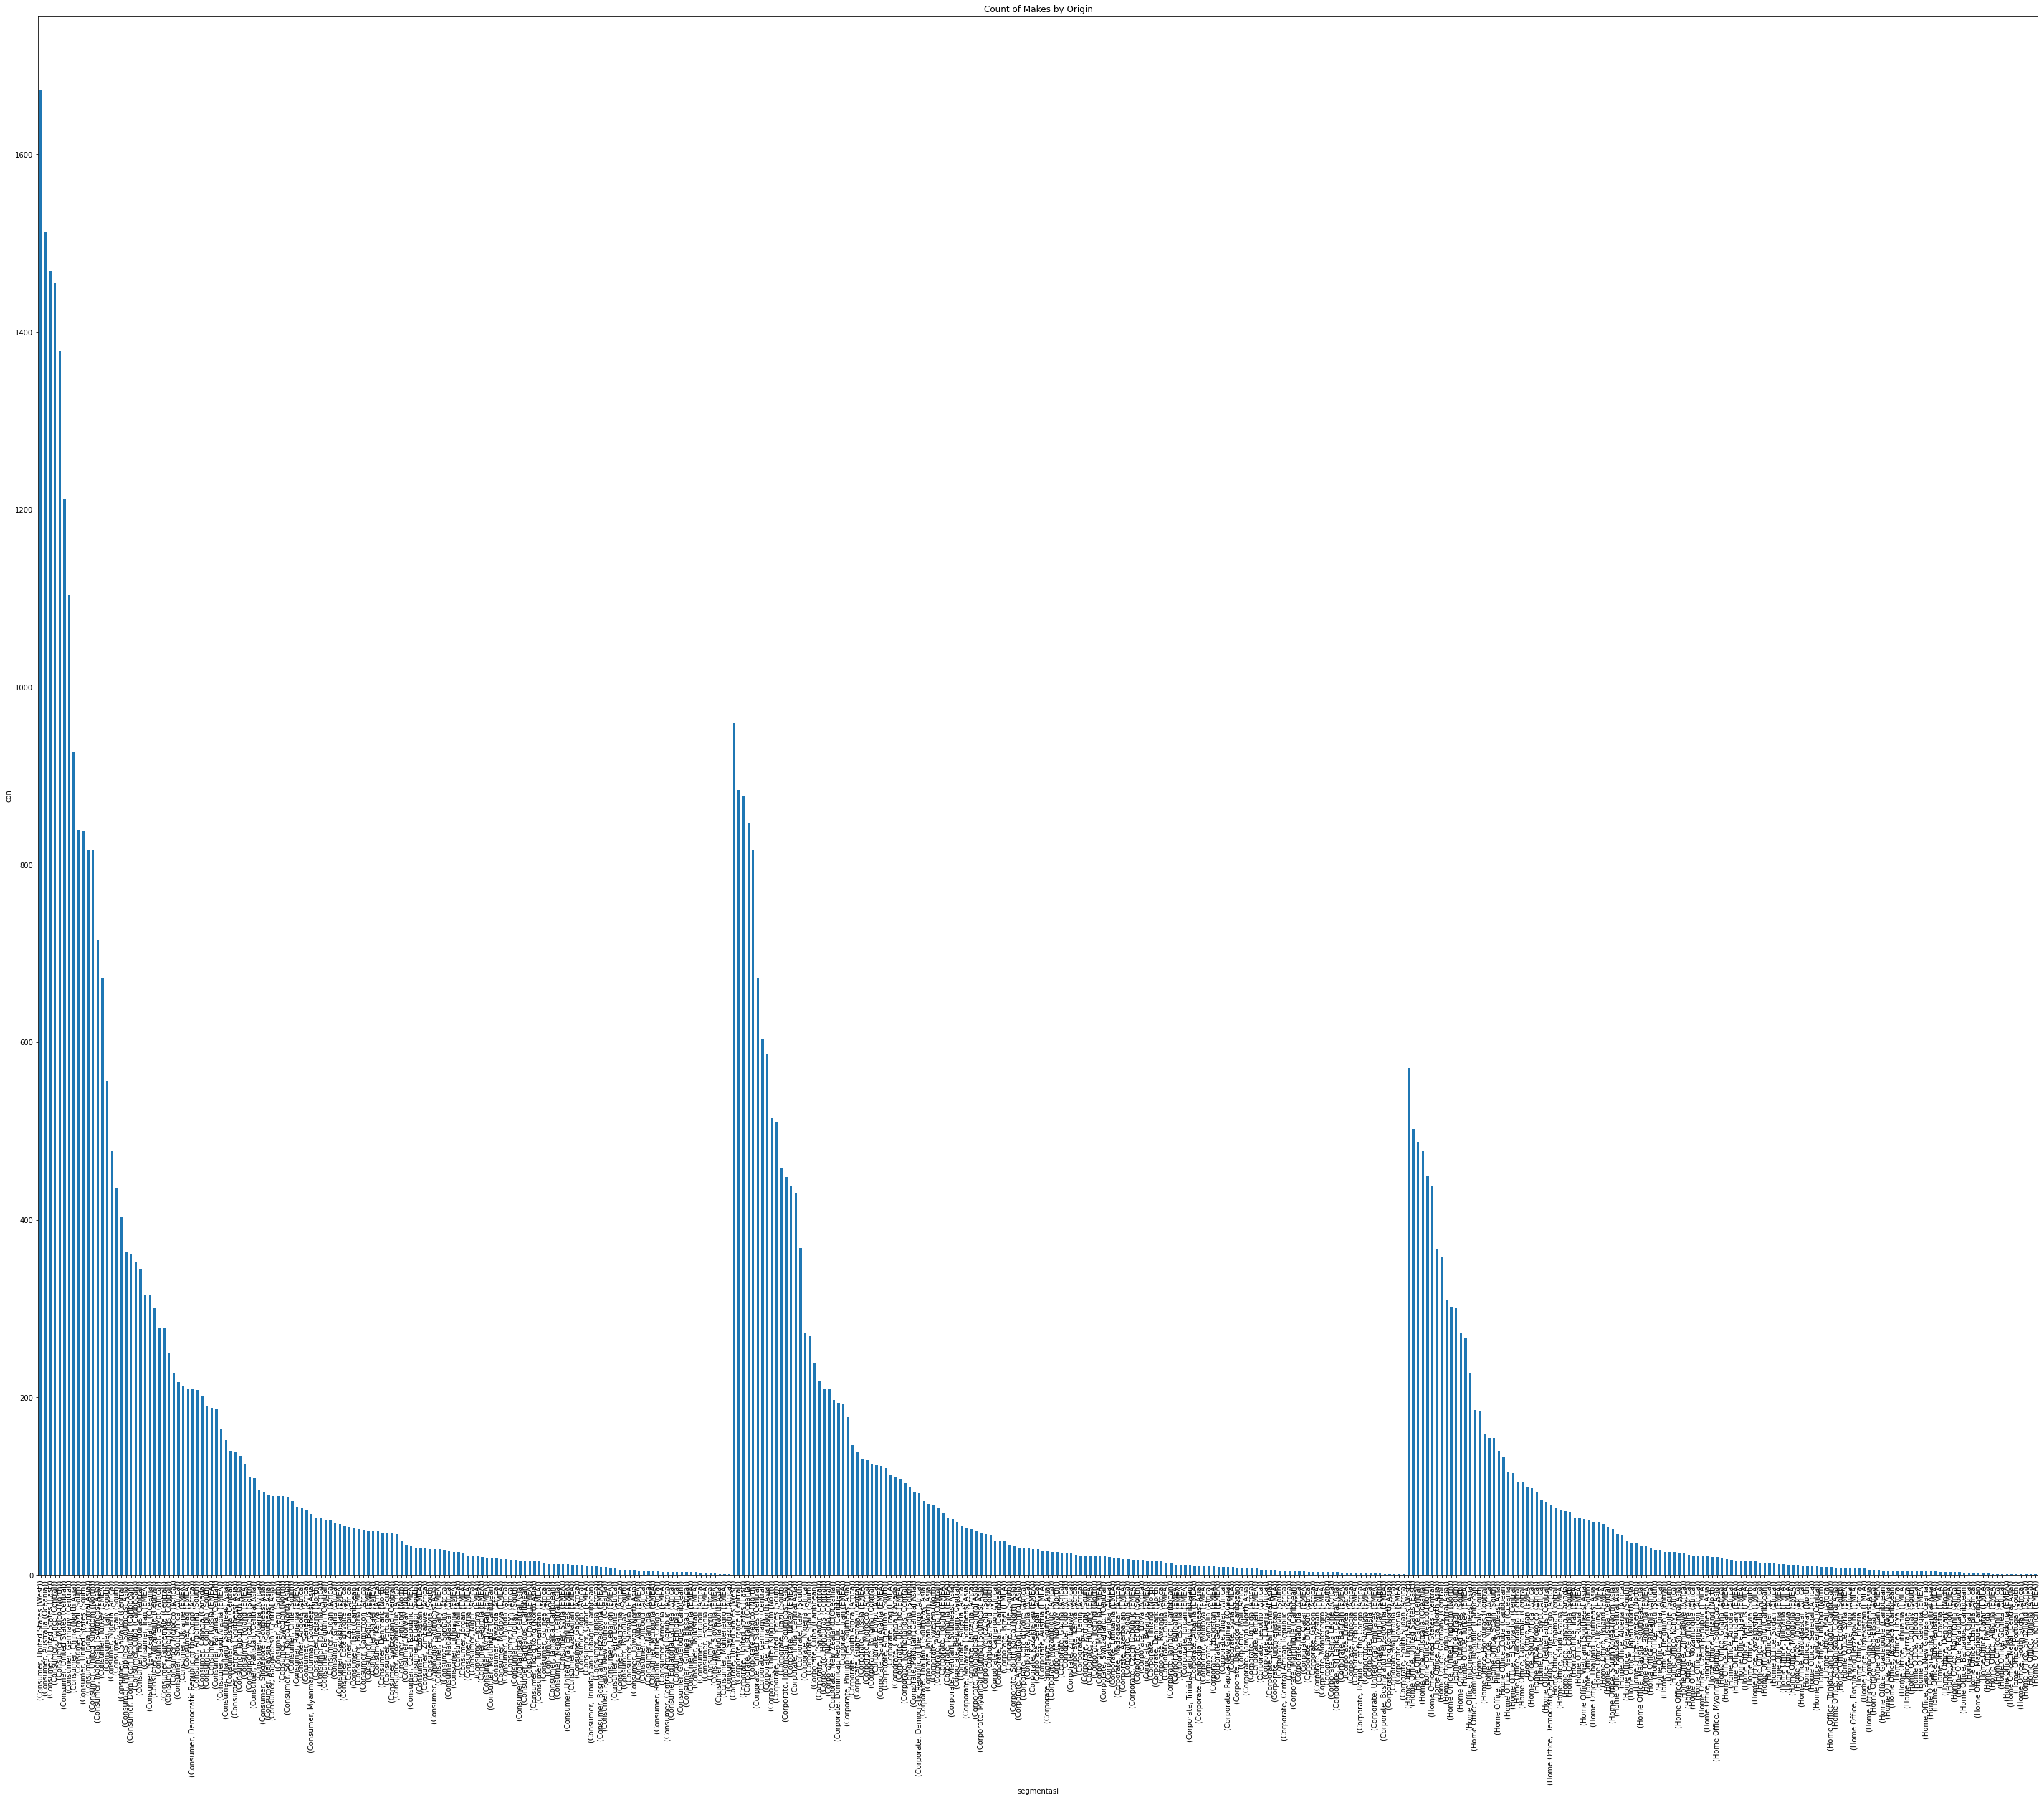

In [30]:
plt.figure(figsize=(50,40))
grouped_data = df.groupby('segment')['con'].value_counts()
ax = grouped_data.plot(kind='bar', stacked=True)
# Menambahkan label pada sumbu dan judul
plt.xlabel('segmentasi')
plt.ylabel('con')
plt.title('Count of Makes by Origin')

#menampilkan grouping
# Menampilkan diagram
plt.show()

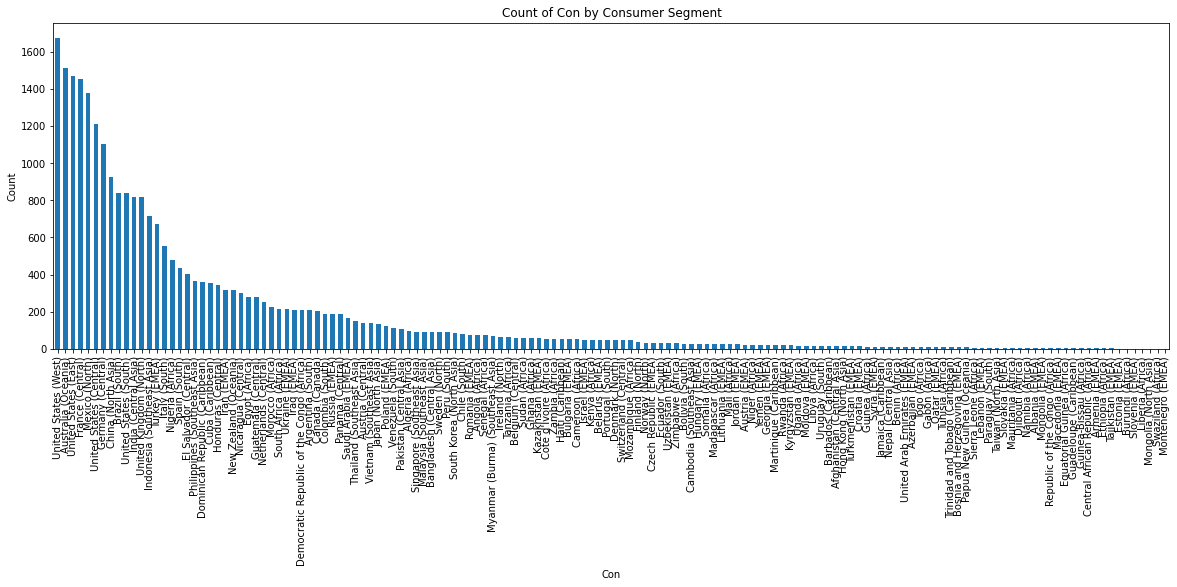

In [31]:
df_cos = df[df['segment'] == 'Consumer']
con_counts = df_cos['con'].value_counts()
plt.figure(figsize=(20,6))
# Plotting the bar chart
ax = con_counts.plot(kind='bar', width=0.6)

# Adding labels and title
plt.xlabel('Con')
plt.ylabel('Count')
plt.title('Count of Con by Consumer Segment')

# Display the plot
plt.show()

In [32]:
##dfcos = df_cos['discount'].sort_values(ascending=False)
#dfcos

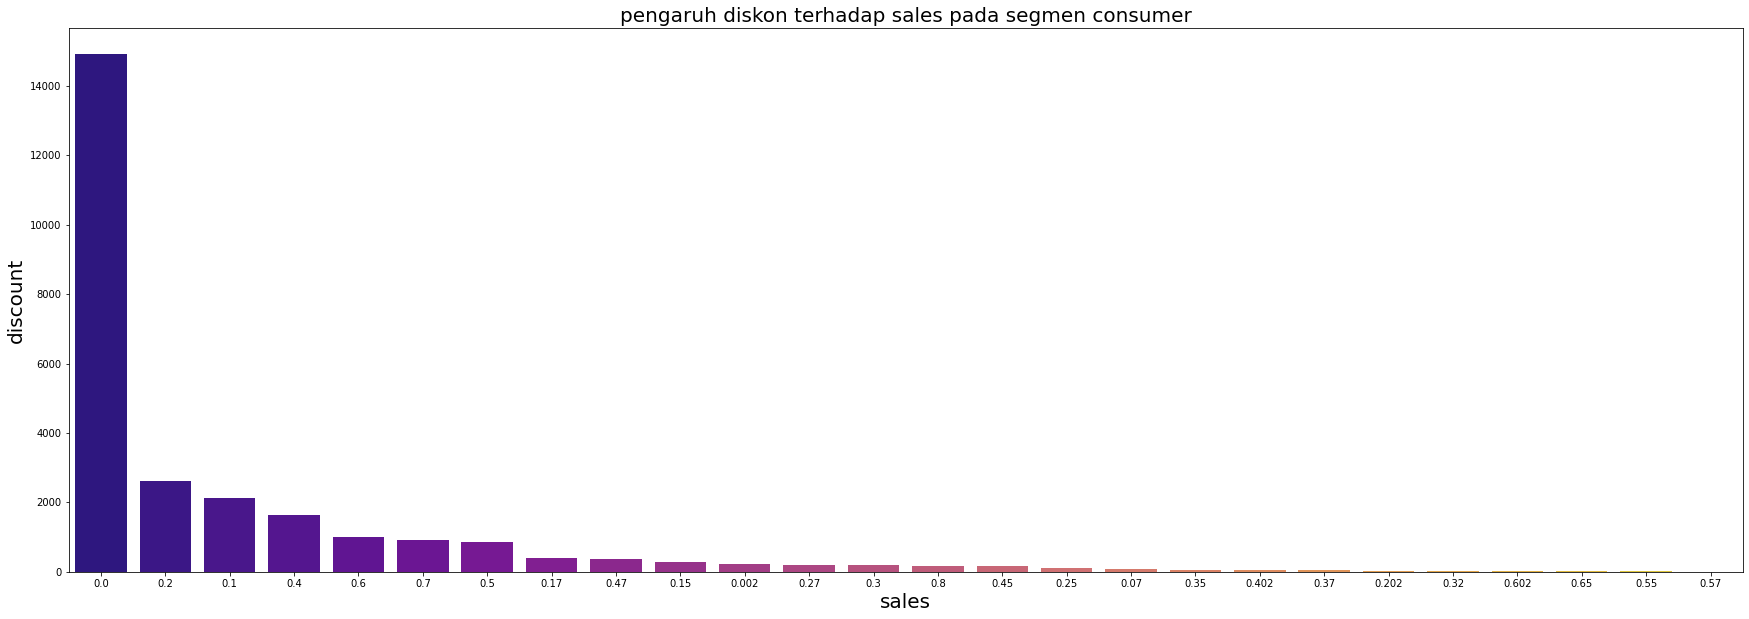

In [33]:
dfcos = df_cos['discount'].value_counts().index
plt.figure(figsize=(30,10))
sns.countplot(x='discount', data=df_cos, palette='plasma', order=dfcos)
plt.xlabel('sales', fontsize=20), plt.ylabel('discount', fontsize=20)
plt.title('pengaruh diskon terhadap sales pada segmen consumer', fontsize=20)
plt.show()

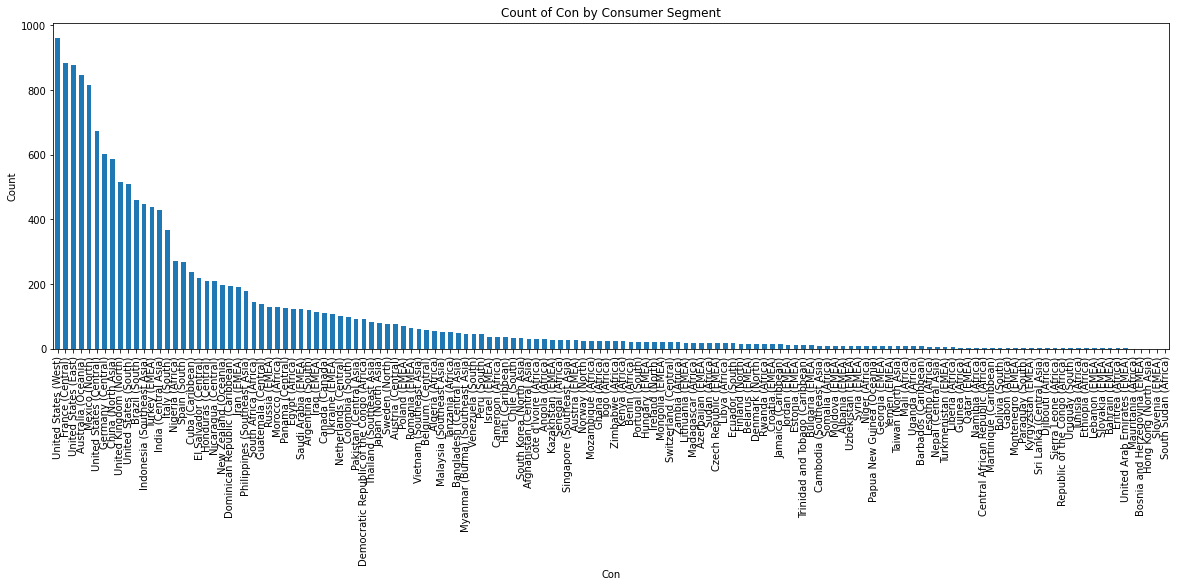

In [34]:

df_cor = df[df['segment'] == 'Corporate']
con_counts = df_cor['con'].value_counts()
plt.figure(figsize=(20,6))
# Plotting the bar chart
ax = con_counts.plot(kind='bar', width=0.6)

# Adding labels and title
plt.xlabel('Con')
plt.ylabel('Count')
plt.title('Count of Con by Consumer Segment')

# Display the plot
plt.show()

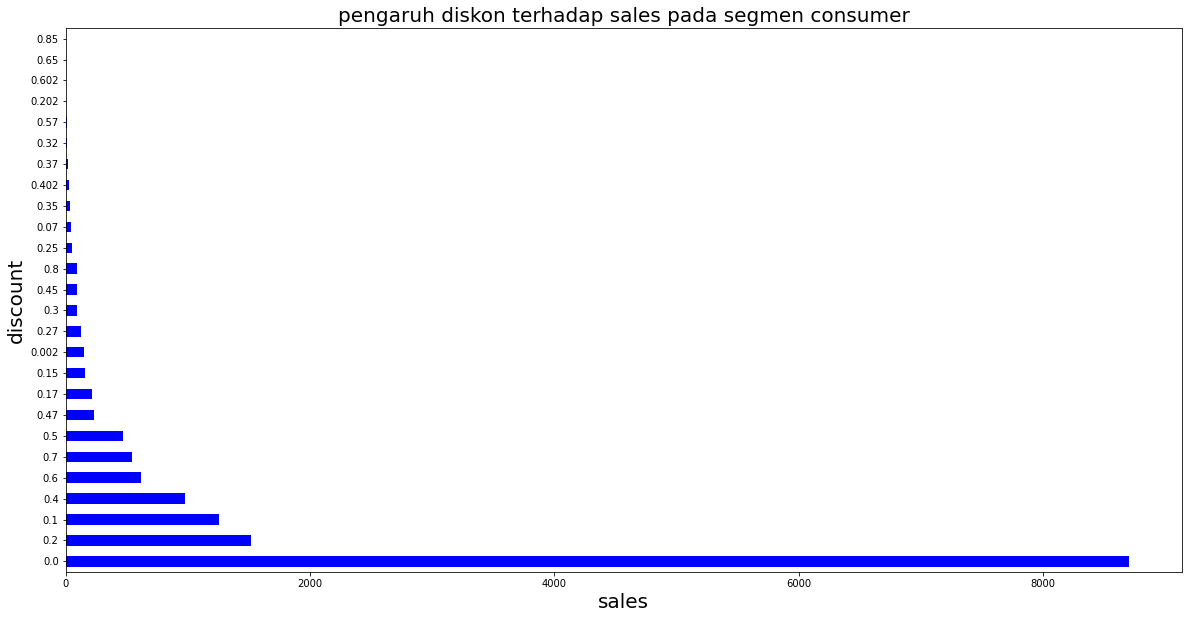

In [35]:
plt.figure(figsize=(20,10))
df_cor.discount.value_counts().plot(kind='barh', color = 'blue')
plt.xlabel('sales', fontsize=20), plt.ylabel('discount', fontsize=20)
plt.title('pengaruh diskon terhadap sales pada segmen consumer', fontsize=20)
plt.show()

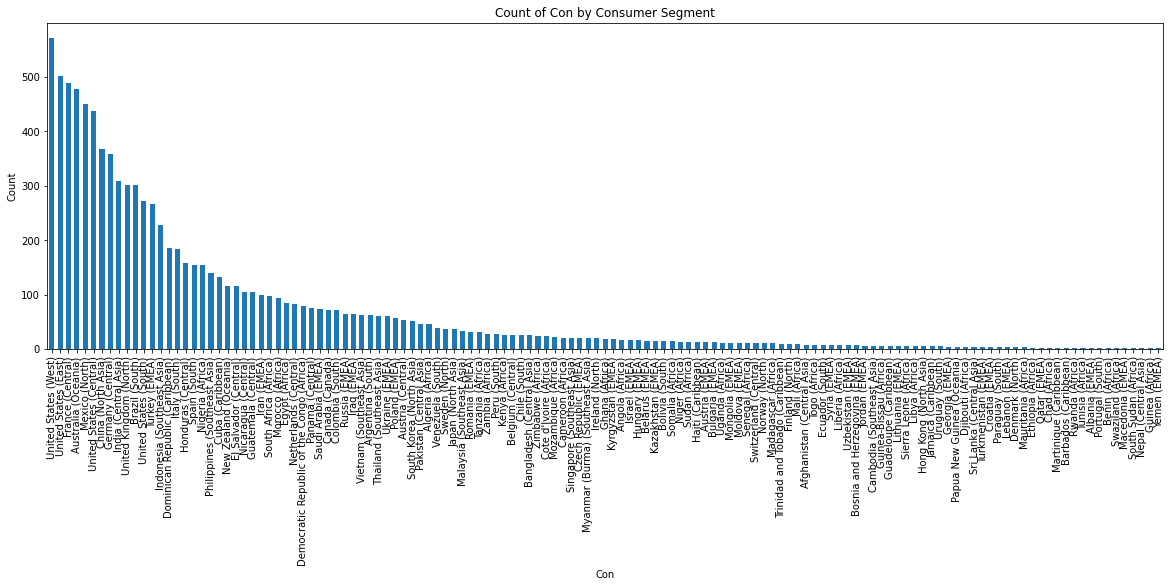

In [36]:
 
df_coh = df[df['segment'] == 'Home Office']
con_counts = df_coh['con'].value_counts()
plt.figure(figsize=(20,6))
# Plotting the bar chart
con_counts.plot(kind='bar', width=0.6)

# Adding labels and title
plt.xlabel('Con')
plt.ylabel('Count')
plt.title('Count of Con by Consumer Segment')

# Display the plot
plt.show()

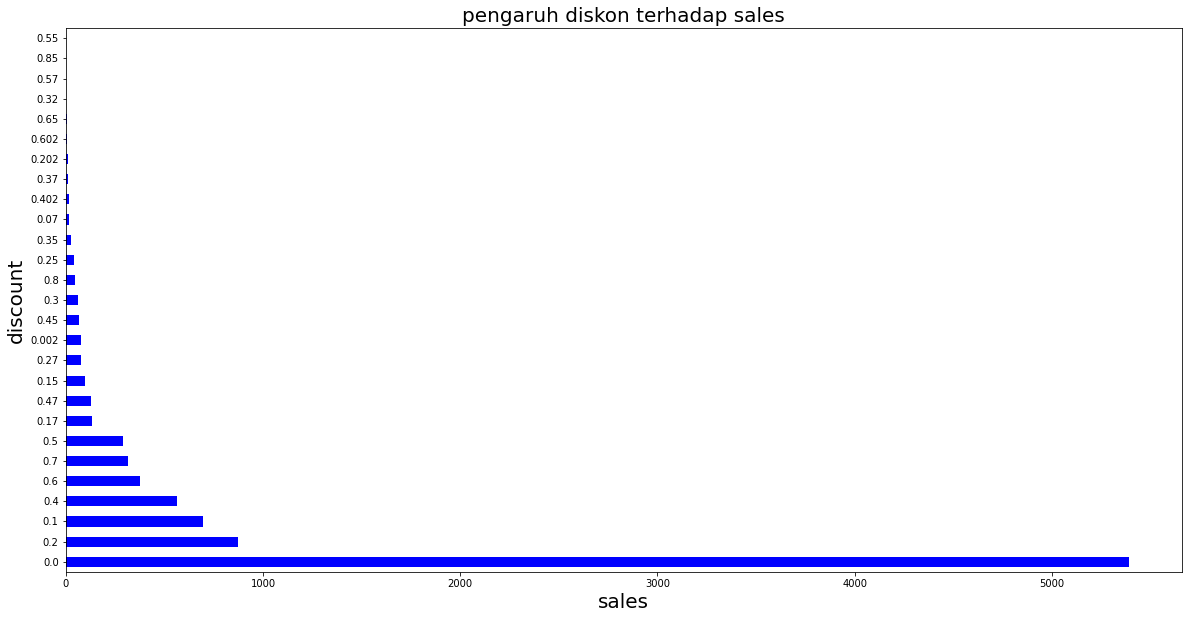

In [37]:
#dalam keseluruhan
plt.figure(figsize=(20,10))
df_coh.discount.value_counts().plot(kind='barh', color = 'blue')
plt.xlabel('sales', fontsize=20), plt.ylabel('discount', fontsize=20)
plt.title('pengaruh diskon terhadap sales', fontsize=20)
plt.show()

In [38]:
df_cos.discount.count()

26518

In [39]:
df_cor.discount.count()

15429

In [40]:
df_coh.discount.count()

9343

In [41]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20,Algeria (Africa)
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30,Australia (Oceania)


In [42]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = df.groupby(['customer_name', 'segment'])['order_id'].count().reset_index()

# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'order_id': 'Total Orders'}, inplace=True)

# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Print the result- the first 10 and reset index
print(repeat_customers_sorted.head(12).reset_index(drop=True))

          customer_name      segment  Total Orders
0       Muhammed Yedwab    Corporate           108
1           Steven Ward    Corporate           106
2            Gary Hwang     Consumer           102
3       Patrick O'Brill     Consumer           102
4           Bill Eplett  Home Office           102
5          Harry Greene     Consumer           101
6          Eric Murdock     Consumer           100
7          Art Ferguson     Consumer            98
8       Brosina Hoffman     Consumer            97
9          Bart Watters    Corporate            96
10  Chloris Kastensmidt     Consumer            96
11           John Grady    Corporate            95


In [43]:
# sales by customer

# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = df.groupby(['customer_name', 'segment'])['sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

        customer_name      segment  sales
0        Tom Ashbrook  Home Office  40489
1        Tamara Chand    Corporate  37453
2           Greg Tran     Consumer  35552
3  Christopher Conant     Consumer  35187
4         Sean Miller  Home Office  35170
5        Bart Watters    Corporate  32315
6    Natalie Fritzler     Consumer  31778
7        Fred Hopkins    Corporate  30404
8           Jane Waco    Corporate  30288
9        Hunter Lopez     Consumer  30246


In [44]:
df.quantity.unique()

array([ 2,  3,  4,  5,  1,  7,  6,  8,  9, 10, 11, 12, 14, 13],
      dtype=int64)

In [45]:
# Frequency of use of a quantity methods 
# sama saja dengan ( df.quantity.value_counts() )

quantity = df['quantity'].value_counts().reset_index()
quantity_model = quantity.rename(columns={'index':'Mode_of_quantity', 'quantity': 'Frequency'})

print(quantity_model)


    Mode_of_quantity  Frequency
0                  2      12748
1                  3       9682
2                  1       8963
3                  4       6385
4                  5       4882
5                  6       3020
6                  7       2385
7                  8       1361
8                  9        987
9                 10        276
10                14        186
11                12        176
12                11        156
13                13         83


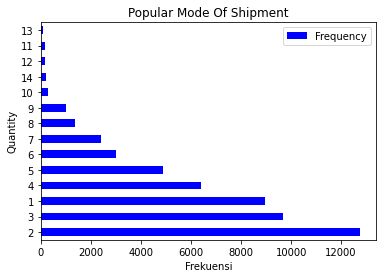

In [46]:
# Plotting a Pie chart
quantity_model.plot(kind='barh', y='Frequency', x='Mode_of_quantity',  color='blue')
# Set the title of the bar chart
plt.xlabel('Frekuensi')
plt.ylabel('Quantity')
plt.title('Popular Mode Of Shipment')
plt.show()


In [47]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20,Algeria (Africa)
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30,Australia (Oceania)


In [48]:
# Sales per state 

# Group the data by state and calculate the total purchases (sales) for each state
state_sales = df.groupby(['con'])['sales'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = state_sales.sort_values(by='sales', ascending=False)

# Print the states 
print(top_sales.head(20).reset_index(drop=True))

                             con   sales
0            Australia (Oceania)  925257
1               France (Central)  858930
2           United States (West)  725514
3             China (North Asia)  700591
4           United States (East)  678834
5              Germany (Central)  628857
6                 Mexico (North)  622620
7           India (Central Asia)  589664
8         United Kingdom (North)  528570
9        United States (Central)  501256
10    Indonesia (Southeast Asia)  404887
11         United States (South)  391750
12                Brazil (South)  361098
13                 Italy (South)  289717
14                 Spain (South)  287162
15  Philippines (Southeast Asia)  183433
16         El Salvador (Central)  177565
17         New Zealand (Oceania)  172022
18              Cuba (Caribbean)  158861
19           Nicaragua (Central)  149694


In [49]:
state_city_sales = df.groupby(['segment','discount'])['sales'].sum().reset_index()

state_city_sales.head(20).sort_values(by='sales', ascending = False)

,segment,discount,sales
0,Consumer,0.000,3588189
3,Consumer,0.100,834583
6,Consumer,0.200,629495
14,Consumer,0.400,285552
18,Consumer,0.500,159040
4,Consumer,0.150,149030
1,Consumer,0.002,131000
5,Consumer,0.170,121555
10,Consumer,0.300,100969
2,Consumer,0.070,68994


In [50]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20,Algeria (Africa)
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30,Australia (Oceania)


In [52]:
# Group the data by product category versus the sales from each product category 
product_category = df.groupby(['category'])['sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='sales', ascending=False) 

# Print the states 
print(top_product_category.reset_index(drop=True))

          category    sales
0       Technology  4744691
1        Furniture  4110884
2  Office Supplies  3787330


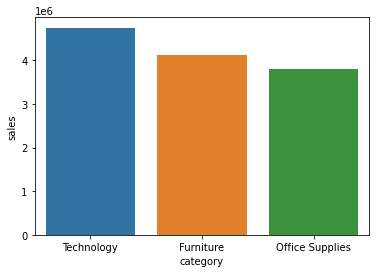

In [59]:
sns.barplot(x='category', y= 'sales', data = top_product_category)
plt.show()

In [76]:
# Group the data by product sub category versus the sales  
product_subcategory = df.groupby(['product_name'])['sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product = product_subcategory.sort_values(by='sales', ascending=False) 

# Print the states  top 10
print(top_product.sort_values(by = 'sales', ascending = False).reset_index(drop=True).head(10))

                                        product_name  sales
0                       Apple Smart Phone, Full Size  86936
1                       Cisco Smart Phone, Full Size  76441
2                    Motorola Smart Phone, Full Size  73159
3                       Nokia Smart Phone, Full Size  71904
4              Canon imageCLASS 2200 Advanced Copier  61600
5         Hon Executive Leather Armchair, Adjustable  58200
6  Office Star Executive Leather Armchair, Adjust...  50667
7  Harbour Creations Executive Leather Armchair, ...  50120
8                      Samsung Smart Phone, Cordless  48654
9                  Nokia Smart Phone, with Caller ID  47880


In [77]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,40800,2,0.0,106.140,2011,20,Algeria (Africa)
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,12000,3,0.1,36.036,2011,30,Australia (Oceania)


In [82]:
# Convert the "Order Date" column to datetime format

df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['order_date'].dt.year)['sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'order_date': 'Year', 'sales':'Total Sales'})

# yearly_sales = 
# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2011      2259511
1  2012      2677493
2  2013      3405860
3  2014      4300041


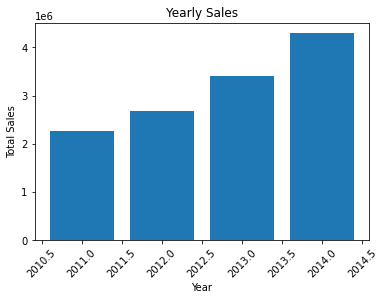

In [87]:
# Ploting a bar graph

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

# Labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()

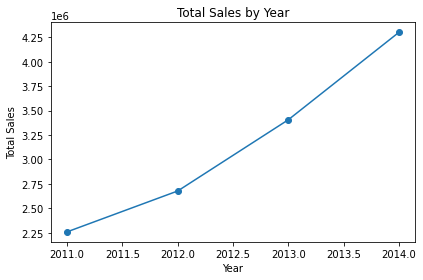

In [88]:
# Create a line graph for total sales by year
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()

plt.show()

In [97]:


# Filter the data for the year 2018
year_sales = df[df['order_date'].dt.year >= 2011]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('M', on='order_date')['sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'order_date':'Month', 'sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2018
print("Monthly Sales for 2011:")
print(monthly_sales)


Monthly Sales for 2011:
        Month  Total Montly Sales
0  2011-01-31              138245
1  2011-02-28              134969
2  2011-03-31              171445
3  2011-04-30              128843
4  2011-05-31              148158
5  2011-06-30              189339
6  2011-07-31              162039
7  2011-08-31              219236
8  2011-09-30              255250
9  2011-10-31              204679
10 2011-11-30              214931
11 2011-12-31              292377
12 2012-01-31              162807
13 2012-02-29              152663
14 2012-03-31              201626
15 2012-04-30              187470
16 2012-05-31              218953
17 2012-06-30              249284
18 2012-07-31              174403
19 2012-08-31              271675
20 2012-09-30              256592
21 2012-10-31              239324
22 2012-11-30              270725
23 2012-12-31              291971
24 2013-01-31              206467
25 2013-02-28              191077
26 2013-03-31              230551
27 2013-04-30           

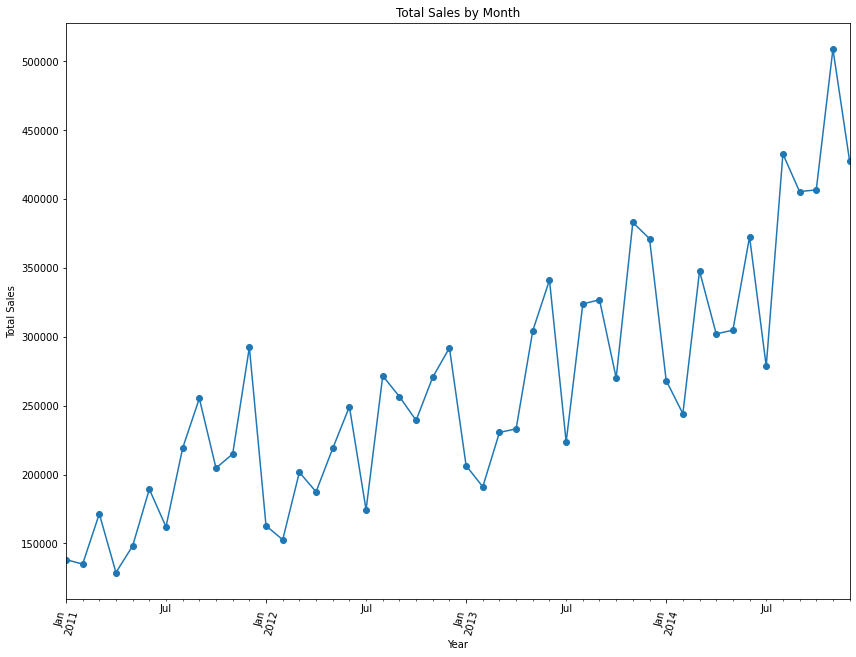

In [105]:
# Create a line graph for total sales by year
#plt.figure(figsize=(20,10))
#plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--')

monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [104]:
#penurunan terendah ada pada indek 3 berdasarkan sum(jumlah perbulan)
df.loc[df['order_date'] == '2011-04-30'].sort_values(by='sales', ascending=False)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
1906,CA-2011-160094,2011-04-30,Justin MacKendrick,Consumer,United States,South,OFF-ST-10000585,Office Supplies,Economy Rollaway Files,826,82600,5,0.0,214.7600,2011,50,United States (South)
1907,IN-2011-40652,2011-04-30,Russell D'Ascenzo,Consumer,Australia,Oceania,FUR-FU-10001933,Furniture,"Tenex Stacking Tray, Black",182,18200,8,0.1,40.2480,2011,80,Australia (Oceania)
1911,CA-2011-160094,2011-04-30,Justin MacKendrick,Consumer,United States,South,OFF-AR-10004010,Office Supplies,Hunt Boston Vacuum Mount KS Pencil Sharpener,175,17500,5,0.0,45.4870,2011,50,United States (South)
1908,UP-2011-870,2011-04-30,Ann Chong,Corporate,Ukraine,EMEA,FUR-NOV-10003053,Furniture,"Novimex Bag Chairs, Set of Two",96,9600,2,0.0,23.1000,2011,20,Ukraine (EMEA)
1909,NI-2011-5380,2011-04-30,Brooke Gillingham,Corporate,Nigeria,Africa,FUR-ELD-10002511,Furniture,"Eldon Photo Frame, Duo Pack",70,7000,4,0.7,-148.9560,2011,40,Nigeria (Africa)
1912,NI-2011-5380,2011-04-30,Brooke Gillingham,Corporate,Nigeria,Africa,FUR-NOV-10004563,Furniture,"Novimex Bag Chairs, Black",52,5200,4,0.7,-45.3240,2011,40,Nigeria (Africa)
1910,CA-2011-156006,2011-04-30,Tamara Manning,Consumer,United States,South,TEC-AC-10002550,Technology,Maxell 4.7GB DVD-RW 3/Pack,48,4800,3,0.0,16.2486,2011,30,United States (South)
1913,IN-2011-40652,2011-04-30,Russell D'Ascenzo,Consumer,Australia,Oceania,FUR-CH-10004306,Furniture,"SAFCO Bag Chairs, Red",44,4400,1,0.1,5.9160,2011,10,Australia (Oceania)


In [103]:
#penjualan tertinggi 2014-11-30
df.loc[df['order_date'] == '2014-11-30'].sort_values(by='sales', ascending=False)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,new_sales,quantity,discount,profit,year,new_quantity,con
49120,IN-2014-10020,2014-11-30,Adam Hart,Corporate,India,Central Asia,OFF-ST-10003953,Office Supplies,"Smead File Cart, Industrial",642,64200,5,0.0,179.700,2014,50,India (Central Asia)
49123,CA-2014-108035,2014-11-30,Ted Trevino,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",390,39000,2,0.2,48.796,2014,20,United States (South)
49121,US-2014-117282,2014-11-30,Rick Hansen,Consumer,Haiti,Caribbean,FUR-CH-10004755,Furniture,"Novimex Swivel Stool, Red",263,26300,4,0.4,-17.584,2014,40,Haiti (Caribbean)
49125,IN-2014-10020,2014-11-30,Adam Hart,Corporate,India,Central Asia,FUR-FU-10002223,Furniture,"Deflect-O Stacking Tray, Durable",228,22800,9,0.0,56.700,2014,90,India (Central Asia)
49122,ZI-2014-6740,2014-11-30,Beth Thompson,Home Office,Zimbabwe,Africa,OFF-BRE-10001197,Office Supplies,"Breville Refrigerator, Black",156,15600,1,0.7,-134.892,2014,10,Zimbabwe (Africa)
49128,CA-2014-108035,2014-11-30,Ted Trevino,Consumer,United States,South,FUR-FU-10004017,Furniture,"Executive Impressions 13"" Chairman Wall Clock",102,10200,5,0.2,19.035,2014,50,United States (South)
49126,MX-2014-144925,2014-11-30,Scott Williamson,Consumer,El Salvador,Central,FUR-CH-10001282,Furniture,"Hon Bag Chairs, Adjustable",95,9500,3,0.0,21.900,2014,30,El Salvador (Central)
49124,MX-2014-128531,2014-11-30,Matt Collins,Consumer,Dominican Republic,Caribbean,OFF-FA-10002286,Office Supplies,"OIC Push Pins, Bulk Pack",95,9500,12,0.2,34.464,2014,120,Dominican Republic (Caribbean)
49127,ZI-2014-6740,2014-11-30,Beth Thompson,Home Office,Zimbabwe,Africa,OFF-ACM-10004587,Office Supplies,"Acme Scissors, Steel",60,6000,8,0.7,-45.744,2014,80,Zimbabwe (Africa)
49130,IN-2014-46420,2014-11-30,Naresj Patel,Consumer,China,North Asia,OFF-SU-10002961,Office Supplies,"Kleencut Ruler, Serrated",41,4100,4,0.0,11.040,2014,40,China (North Asia)
